In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('solar_weather_demo.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              196776 non-null  object 
 1   Energy delta[Wh]  196776 non-null  int64  
 2   GHI               196776 non-null  float64
 3   temp              196776 non-null  float64
 4   pressure          196776 non-null  int64  
 5   humidity          196776 non-null  int64  
 6   wind_speed        196776 non-null  float64
 7   rain_1h           196776 non-null  float64
 8   clouds_all        196776 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 13.5+ MB


In [5]:
df.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all'],
      dtype='object')

In [6]:
df['Time']

0         2017-01-01 00:00:00
1         2017-01-01 00:15:00
2         2017-01-01 00:30:00
3         2017-01-01 00:45:00
4         2017-01-01 01:00:00
                 ...         
196771    2022-08-31 16:45:00
196772    2022-08-31 17:00:00
196773    2022-08-31 17:15:00
196774    2022-08-31 17:30:00
196775    2022-08-31 17:45:00
Name: Time, Length: 196776, dtype: object

In [7]:
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract the date from the 'Time' column
df['Date'] = df['Time'].dt.date

# Group by 'Date' and calculate the total GHI for each day
daily_ghi = df.groupby('Date')['GHI'].sum()

# Get the top 3 days with the highest total GHI
top_3_days = daily_ghi.nlargest(3)

print(top_3_days)

Date
2021-06-16    8677.8
2018-06-07    8640.8
2018-06-06    8610.5
Name: GHI, dtype: float64


In [8]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,clouds_all,Date
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,100,2017-01-01
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,100,2017-01-01
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,100,2017-01-01
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,100,2017-01-01
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,100,2017-01-01


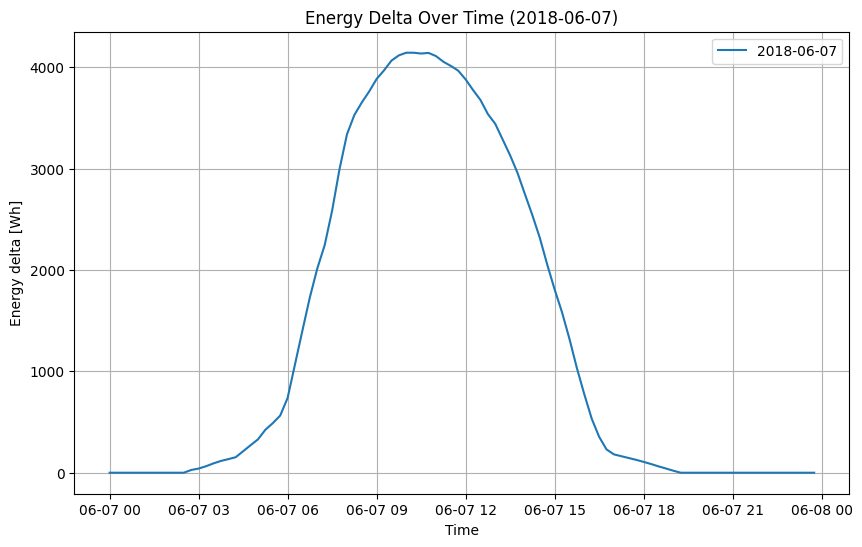

In [9]:

# Ensure the 'Time' column is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract the date from the 'Time' column
df['Date'] = df['Time'].dt.date

# Filter the dataset for the specific day
specific_day_data = df[df['Date'] == pd.to_datetime('2018-06-07').date()]

# Plot the data for the specific day
plt.figure(figsize=(10, 6))
plt.plot(specific_day_data['Time'], specific_day_data['Energy delta[Wh]'], label='2018-06-07')

plt.xlabel('Time')
plt.ylabel('Energy delta [Wh]')
plt.title('Energy Delta Over Time (2018-06-07)')
plt.legend()
plt.grid()
plt.show()

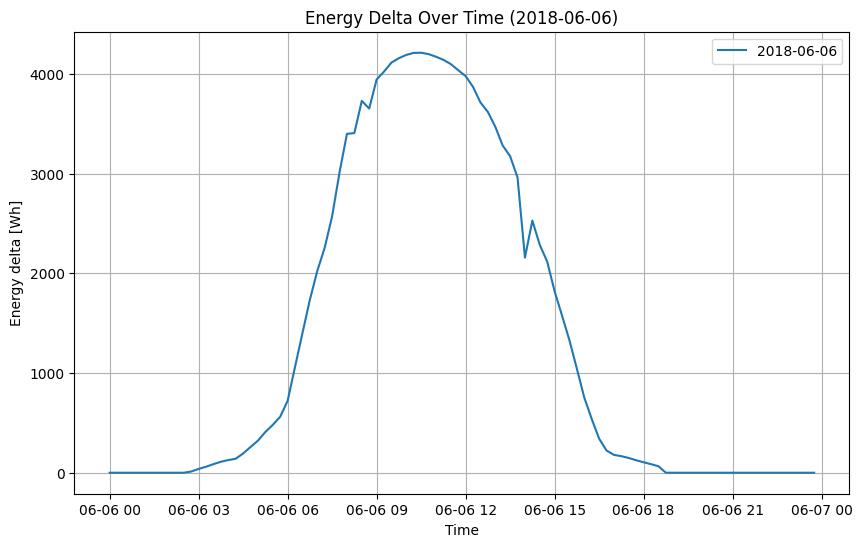

In [10]:

# Ensure the 'Time' column is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract the date from the 'Time' column
df['Date'] = df['Time'].dt.date

# Filter the dataset for the specific day 
specific_day_data = df[df['Date'] == pd.to_datetime('2018-06-06').date()]

# Plot the data for the specific day
plt.figure(figsize=(10, 6))
plt.plot(specific_day_data['Time'], specific_day_data['Energy delta[Wh]'], label='2018-06-06')

plt.xlabel('Time')
plt.ylabel('Energy delta [Wh]')
plt.title('Energy Delta Over Time (2018-06-06)')
plt.legend()
plt.grid()
plt.show()

# For digital twins

In [11]:
# Filter the dataset for the two specific days
filtered_data = df[df['Date'].isin([pd.to_datetime('2018-06-06').date(), pd.to_datetime('2018-06-07').date()])]

filtered_data = filtered_data.drop(columns=['Date'])


# Save the filtered data to a CSV file
filtered_data.to_csv('solar_weather_demo_0607.csv', index=False)



# For homepage

In [15]:
# Filter the dataset for the 7 days from 2018-06-01 to 2018-06-07
seven_days_data = df[(df['Date'] >= pd.to_datetime('2018-06-01').date()) & (df['Date'] <= pd.to_datetime('2018-06-07').date())]

# Display the filtered data
seven_days_data.head()

filtered_data.to_csv('solar_weather_demo_homepage.csv', index=False)

In [12]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 49536 to 49727
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              192 non-null    datetime64[ns]
 1   Energy delta[Wh]  192 non-null    int64         
 2   GHI               192 non-null    float64       
 3   temp              192 non-null    float64       
 4   pressure          192 non-null    int64         
 5   humidity          192 non-null    int64         
 6   wind_speed        192 non-null    float64       
 7   rain_1h           192 non-null    float64       
 8   clouds_all        192 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 15.0 KB


In [14]:
filtered_data.head(20)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,clouds_all
49536,2018-06-06 00:00:00,0,0.0,9.2,1018,78,4.2,0.0,0
49537,2018-06-06 00:15:00,0,0.0,9.2,1018,78,4.2,0.0,0
49538,2018-06-06 00:30:00,0,0.0,9.2,1018,78,4.2,0.0,0
49539,2018-06-06 00:45:00,0,0.0,9.2,1018,78,4.2,0.0,0
49540,2018-06-06 01:00:00,0,0.0,9.0,1019,79,4.2,0.0,0
49541,2018-06-06 01:15:00,0,0.0,9.0,1019,79,4.2,0.0,0
49542,2018-06-06 01:30:00,0,0.0,9.0,1019,79,4.2,0.0,0
49543,2018-06-06 01:45:00,0,0.0,9.0,1019,79,4.2,0.0,0
49544,2018-06-06 02:00:00,0,0.0,8.7,1019,78,4.3,0.0,4
49545,2018-06-06 02:15:00,0,0.0,8.7,1019,78,4.3,0.0,4
